In [1]:
import numpy as np
import drawSvg as draw

C:\Users\mmoud\Anaconda3\lib\site-packages\drawSvg\raster.py:11: RuntimeWarning: CairoSVG will need to be installed to rasterize images: Install with `pip3 install cairosvg`
  warnings.warn(msg, RuntimeWarning)


Body Class

In [2]:
class Body:
    def __init__(self,mass, x,y, vx,vy, pixel_radius, r,g,b):
        self.mass = mass
        self.x = x
        self.y = y
        self.vx = vx
        self.vy = vy
        #radius
        self.rad_pixel = pixel_radius
        #define color
        self.color = '#%02x%02x%02x' % (r,g,b)
        
    def get_mass(self):
        return self.mass
    
    def get_x(self):
        return self.x
    def get_vx(self):
        return self.vx
  
    def get_y(self):
        return self.y
    def get_vy(self):
        return self.vy
    
    def update_position(self, timestep):
        self.x = self.x + timestep * self.vx
        self.y = self.y + timestep * self.vy
        
    def update_velocity(self, ax, ay, timestep):
        self.vx = self.vx + timestep * ax
        self.vy = self.vy + timestep * ay
        
    def draw(self, pixels_per_meter):
        # draw circle
        x_pixel = self.x*pixels_per_meter
        y_pixel = self.y*pixels_per_meter
        D.append(draw.Circle(x_pixel, y_pixel, self.rad_pixel, fill=self.color))
        
        
        
        
    

In [3]:
## driver code
G = 6.67384*(10**(-11))
AU = 1.49598e11 # number of meters per astronomical unit
EM = 5.9736e24  # mass of the Earth in kilograms

TIME_SCALE = 3.0e6              # how many real seconds for each second of simulation
PIXELS_PER_METER = 120. / AU    # distance scale for the simulation

FRAME_RATE = 30
TIMESTEP = 1.0 / FRAME_RATE

# Solar system data comes from
#   http://hyperphysics.phy-astr.gsu.edu/hbase/solar/soldata2.html
sun     = Body(1.98892e30, 0, 0, 0, 0, 15, 255, 255, 0)
mercury = Body(.06 * EM, -.3871 * AU, 0, 0, 47890, 3, 255, 102, 0)


In [4]:
print('Sun x coord, y coord and mass')
print(sun.get_x(),sun.get_y(),sun.get_mass())
print('Sun vx coord, vy coord ')
print(sun.get_vx(),sun.get_vy())
sun.update_position(TIMESTEP)
sun.update_velocity(TIMESTEP,0,0)
print('Sun x coord, y coord and mass')
print(sun.get_x(),sun.get_y(),sun.get_mass())
print('Sun vx coord, vy coord ')
print(sun.get_vx(),sun.get_vy())

Sun x coord, y coord and mass
0 0 1.98892e+30
Sun vx coord, vy coord 
0 0
Sun x coord, y coord and mass
0.0 0.0 1.98892e+30
Sun vx coord, vy coord 
0.0 0


In [5]:
print('mercury x coord, y coord and mass')
print(mercury.get_x(),mercury.get_y(),mercury.get_mass())
print('mercury vx coord, vy coord ')
print(mercury.get_vx(),mercury.get_vy())
mercury.update_position(1000000*TIMESTEP)
mercury.update_velocity(1000000*TIMESTEP,-0.3,1)
print('mercury x coord, y coord and mass')
print(mercury.get_x(),mercury.get_y(),mercury.get_mass())
print('mercury vx coord, vy coord ')
print(mercury.get_vx(),mercury.get_vy())

mercury x coord, y coord and mass
-57909385800.0 0 3.5841599999999996e+23
mercury vx coord, vy coord 
0 47890
mercury x coord, y coord and mass
-57909385800.0 1596333333.3333335 3.5841599999999996e+23
mercury vx coord, vy coord 
33333.333333333336 47889.7


System Class

In [6]:
class System:
    def __init__(self, body_list):
        self.body_list = body_list
    
    def compute_acceleration(self,index):
        ax = 0
        ay = 0
        for i in range(len(self.body_list)):
            if i == index :
                ax += 0 
                ay += 0
            else:    
                d_x = self.body_list[i].get_x() - self.body_list[index].get_x()
                d_y = self.body_list[i].get_y() - self.body_list[index].get_y()
                dist = np.sqrt((d_x**2) + (d_y**2))
                a = G * self.body_list[i].get_mass()/(dist**2)
                ax += a*d_x/ dist 
                ay += a*d_y/ dist
            return (ax,ay)
            
            
        
    def update(self, timestep):
        for n in range(len(self.body_list)):
            
            self.body_list[n].update_position(timestep)
            
            ax,ay = self.compute_acceleration(n)
#             ax=0
#             ay=0
            #print(ax,ay)
            self.body_list[n].update_velocity(ax, ay,timestep)
#             print(self.body_list[n].get_x())
            
    def draw(self, pixels_per_meter):
        for n in range(len(self.body_list)):
            self.body_list[n].draw(pixels_per_meter)
           
        
        

In [7]:
G = 6.67384*(10**(-11))
AU = 1.49598e11 # number of meters per astronomical unit
EM = 5.9736e24  # mass of the Earth in kilograms

TIME_SCALE = 3.0e6              # how many real seconds for each second of simulation
PIXELS_PER_METER = 120. / AU    # distance scale for the simulation

FRAME_RATE = 30
TIMESTEP = 1.0 / FRAME_RATE

# Solar system data comes from
#   http://hyperphysics.phy-astr.gsu.edu/hbase/solar/soldata2.html
sun     = Body(1.98892e30, 0, 0, 0, 0, 15, 255, 255, 0)
mercury = Body(.06 * EM, -.3871 * AU, 0, 0, 47890, 3, 255, 102, 0)
venus   = Body(.82 * EM, -.7233 * AU, 0, 0, 35040, 6, 0, 153, 51)
earth   = Body(1.0 * EM, -1.0 * AU, 0, 0, 29790, 7, 0, 102, 255)
mars    = Body(.11 * EM, -1.524 * AU, 0, 0, 24140, 4, 204, 51, 0)

solar_system = System([sun, mercury, venus, earth, mars])



In [8]:

def draw_frame():
    solar_system.draw(PIXELS_PER_METER)
    solar_system.update(TIMESTEP * TIME_SCALE)
    return( D )



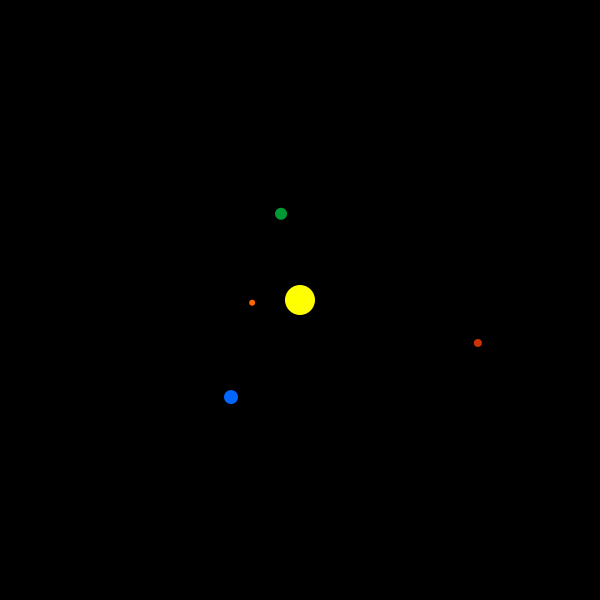

KeyboardInterrupt: 

In [9]:
with draw.animate_jupyter(draw_frame, delay=0.05) as anim:
    t=0
    while ( True ):#t<200: #
        D = draw.Drawing(600, 600, origin='center') # clear canvas
        D.append( draw.Rectangle(-300,-300,600,600,fill='black')) # black background
        anim.draw_frame()
        #t+=1



In [ ]:
# for n in [sun, mercury, venus, earth, mars]:
#     print(n.get_x(), n.get_y())
#     print(n.get_vx(), n.get_vy())
    
# D = draw.Drawing(600, 600, origin='center')            
# draw_frame()
solar_system.update(TIMESTEP * TIME_SCALE)

